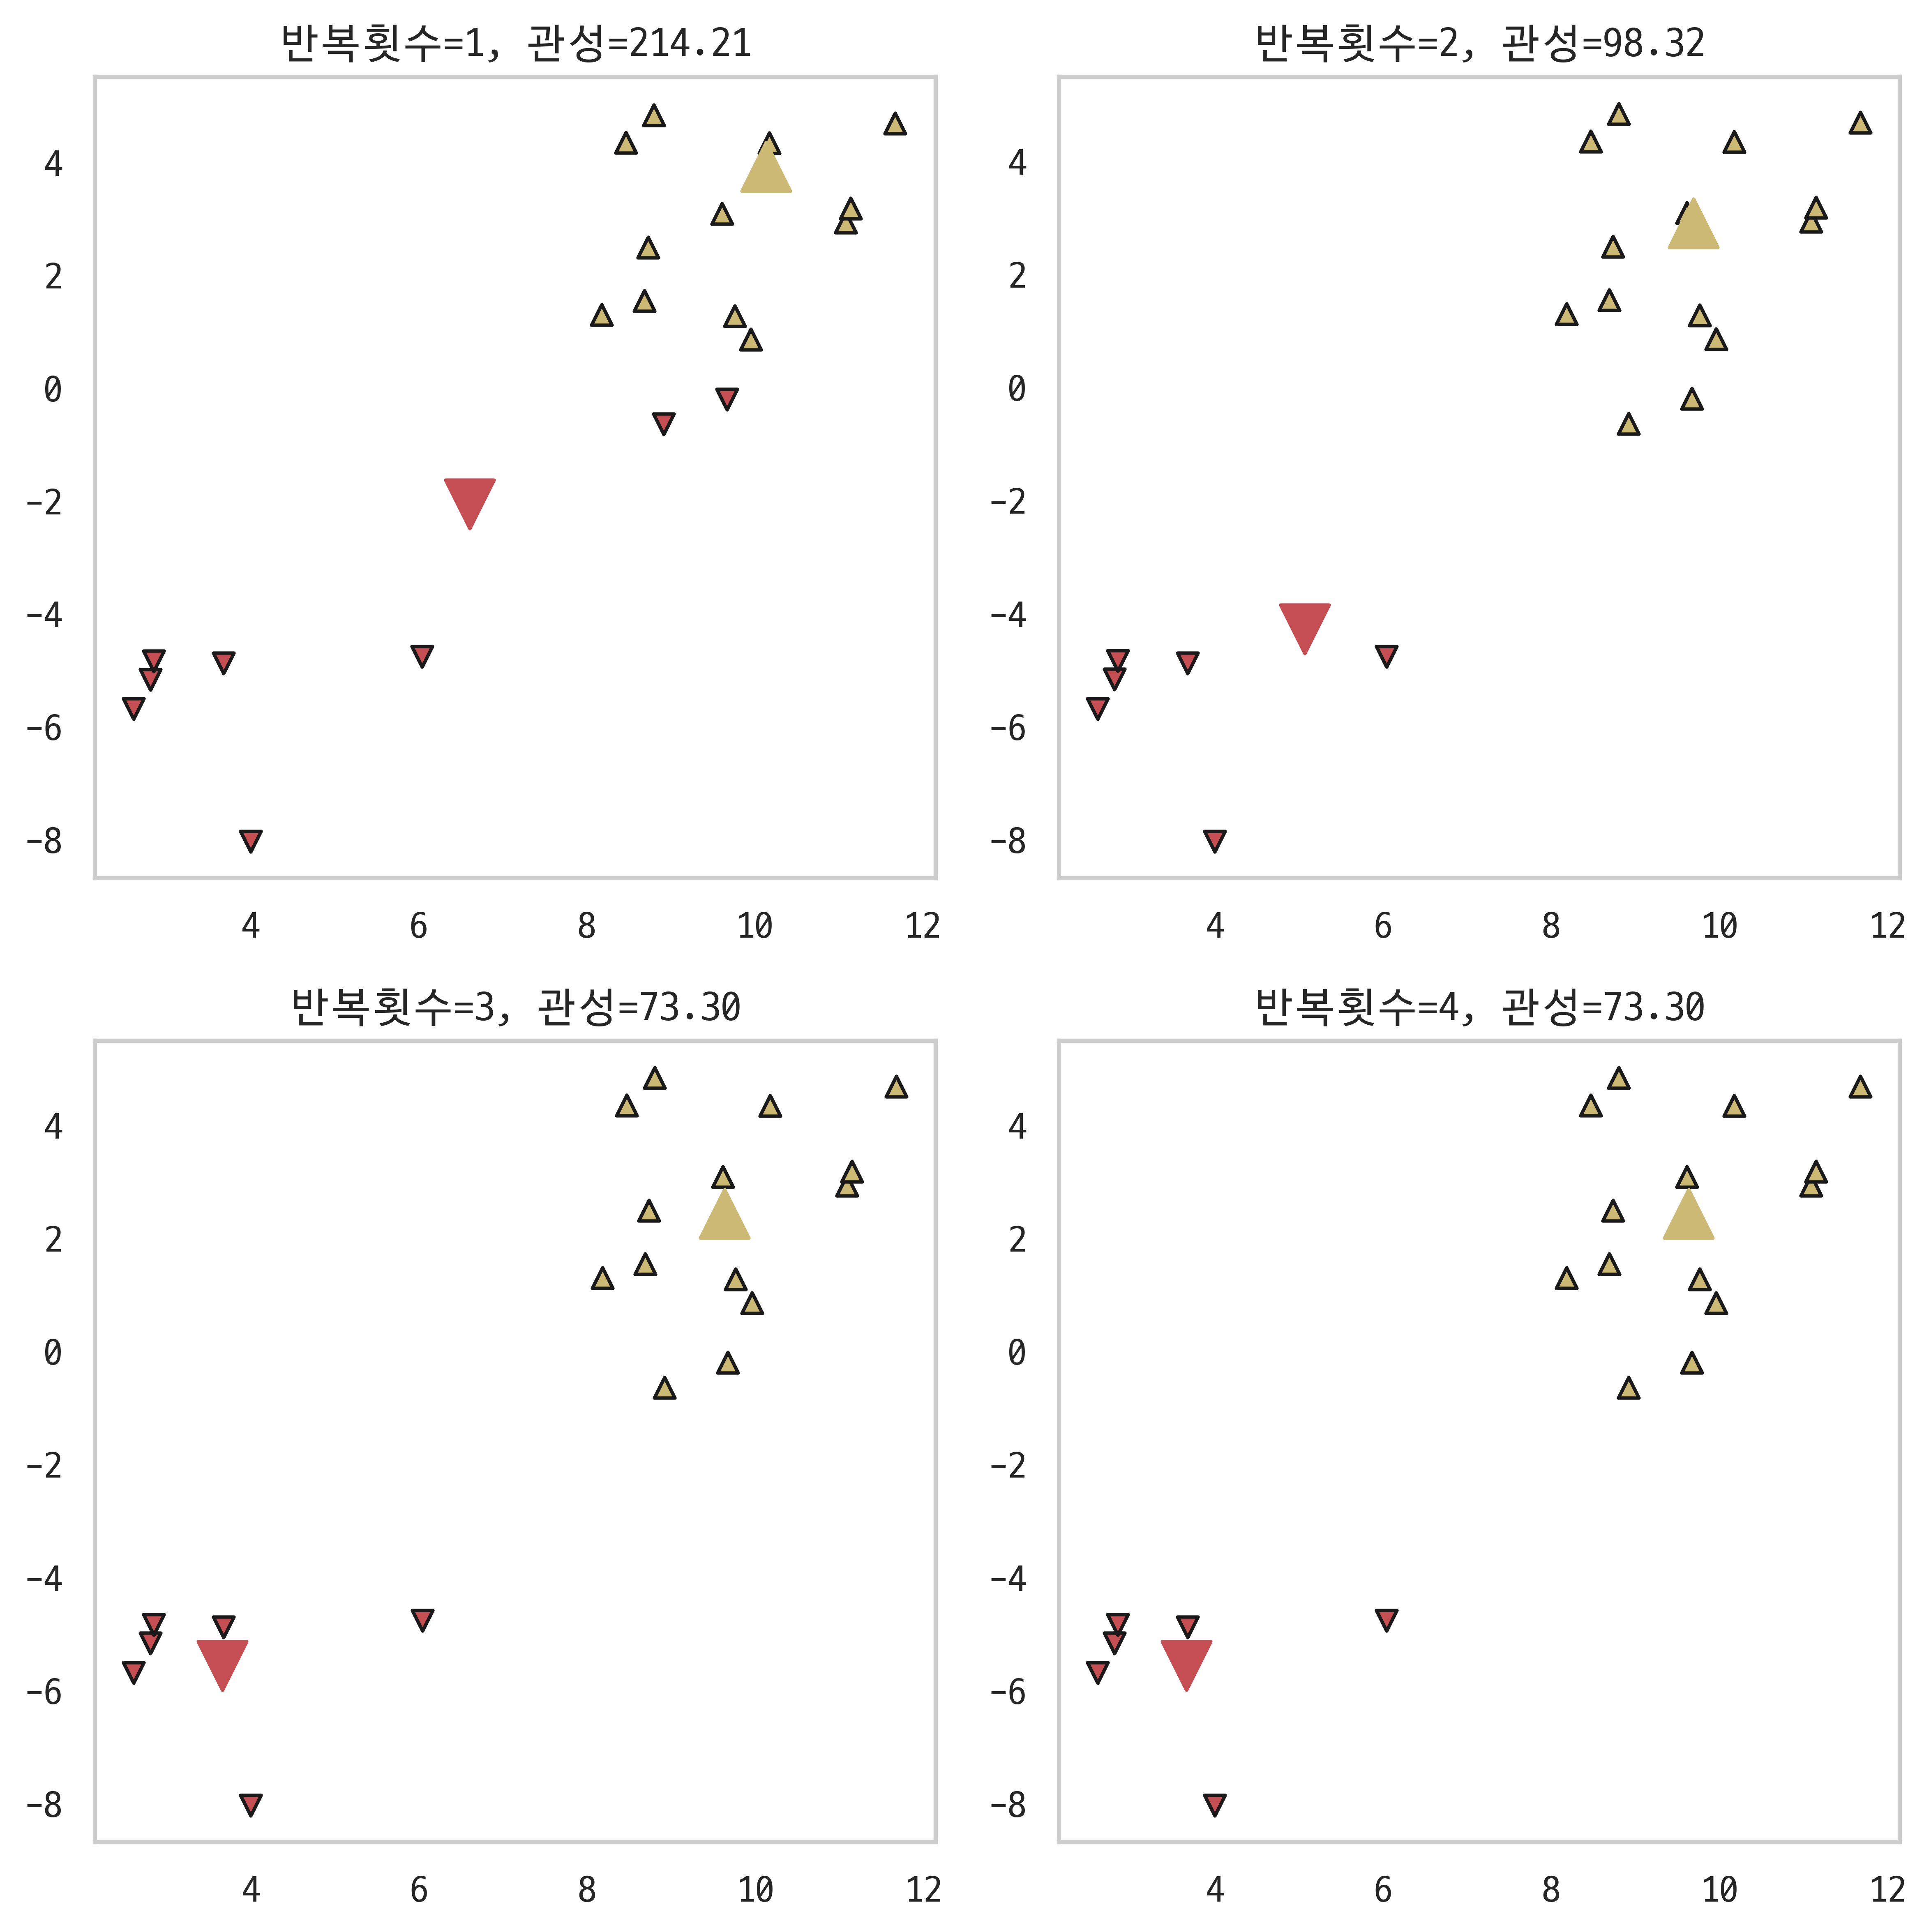

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=20, random_state=4)

def plot_KMeans(n):
    model = KMeans(n_clusters=2, init='random', n_init=1, max_iter=n, random_state=6).fit(X)
    c0, c1 = model.cluster_centers_
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], marker='v', facecolor='r', edgecolor='k')
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], marker='^', facecolor='y', edgecolor='k')
    plt.scatter(c0[0], c0[1], marker='v', c='r', s=200)
    plt.scatter(c1[0], c1[1], marker='^', c='y', s=200)
    plt.grid(False)
    plt.title('반복횟수={}, 관성={:5.2f}'.format(n, -model.score(X)))

plt.figure(figsize=(8, 8))
plt.subplot(221)
plot_KMeans(1)
plt.subplot(222)
plot_KMeans(2)
plt.subplot(223)
plot_KMeans(3)
plt.subplot(224)
plot_KMeans(4)
plt.tight_layout()
plt.show()

#### K-평균++ 알고리즘

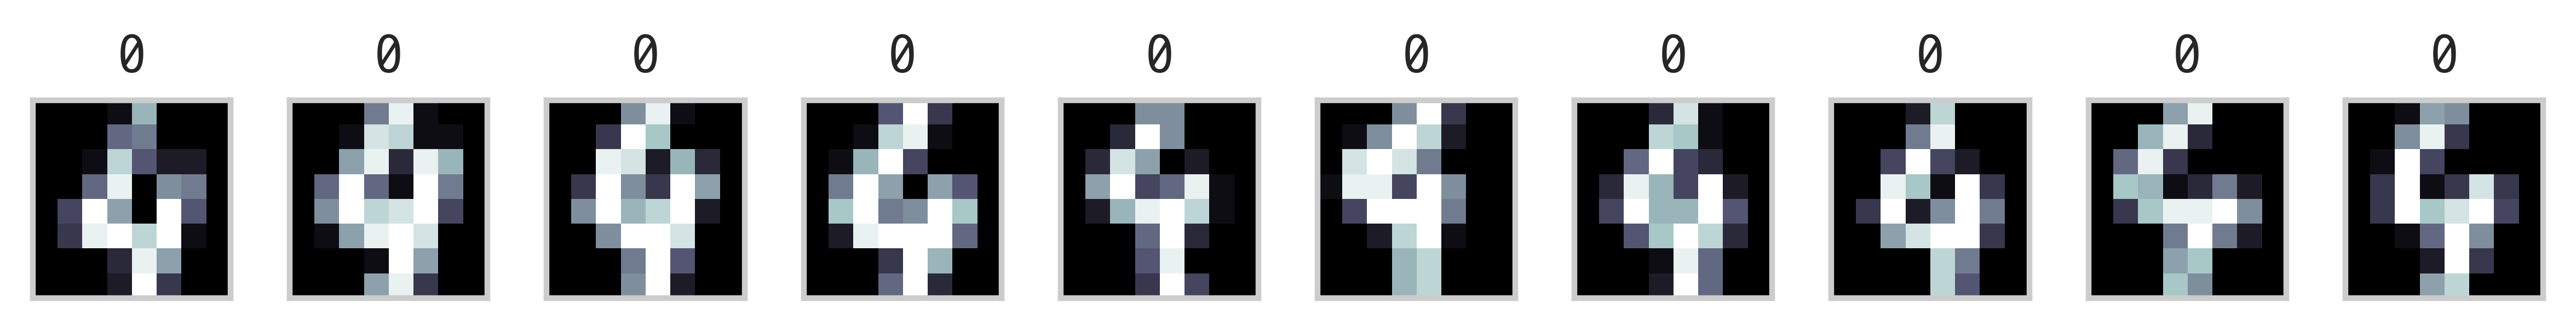

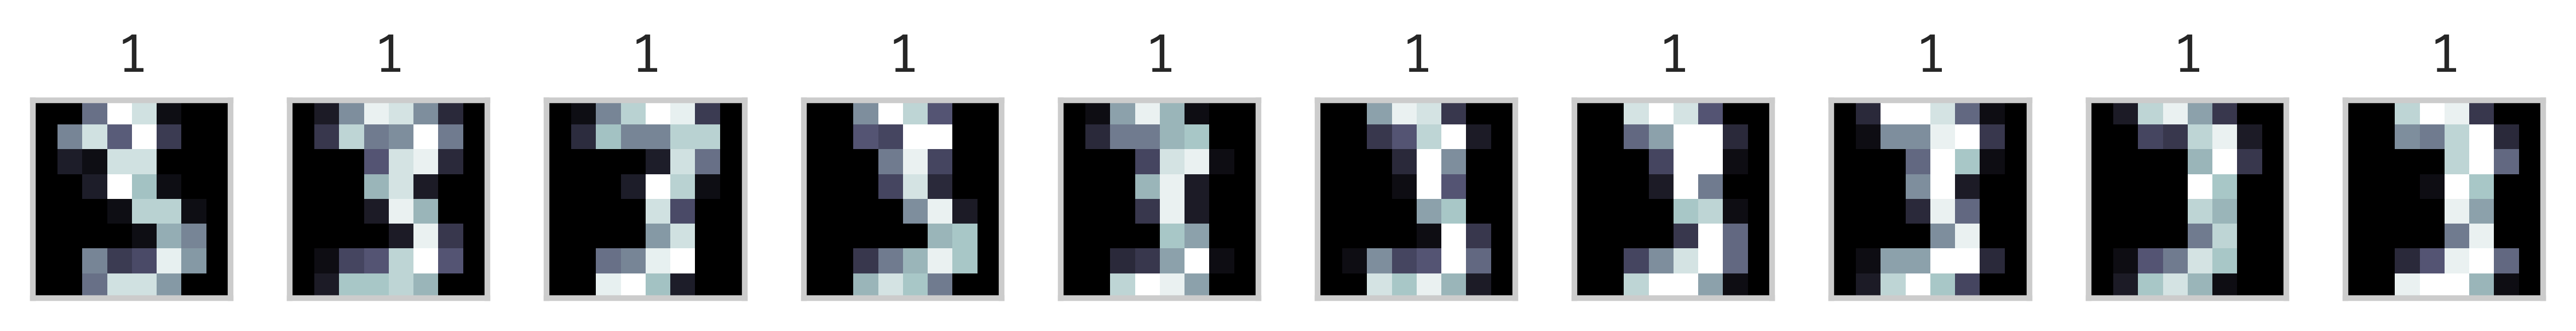

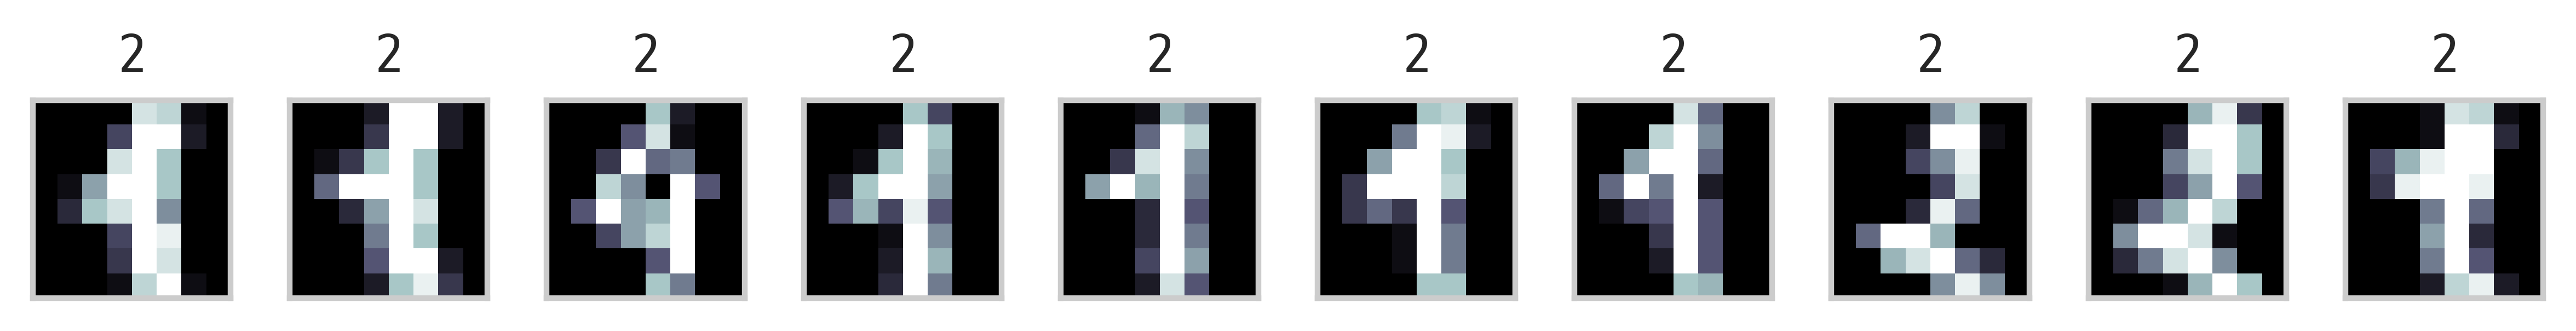

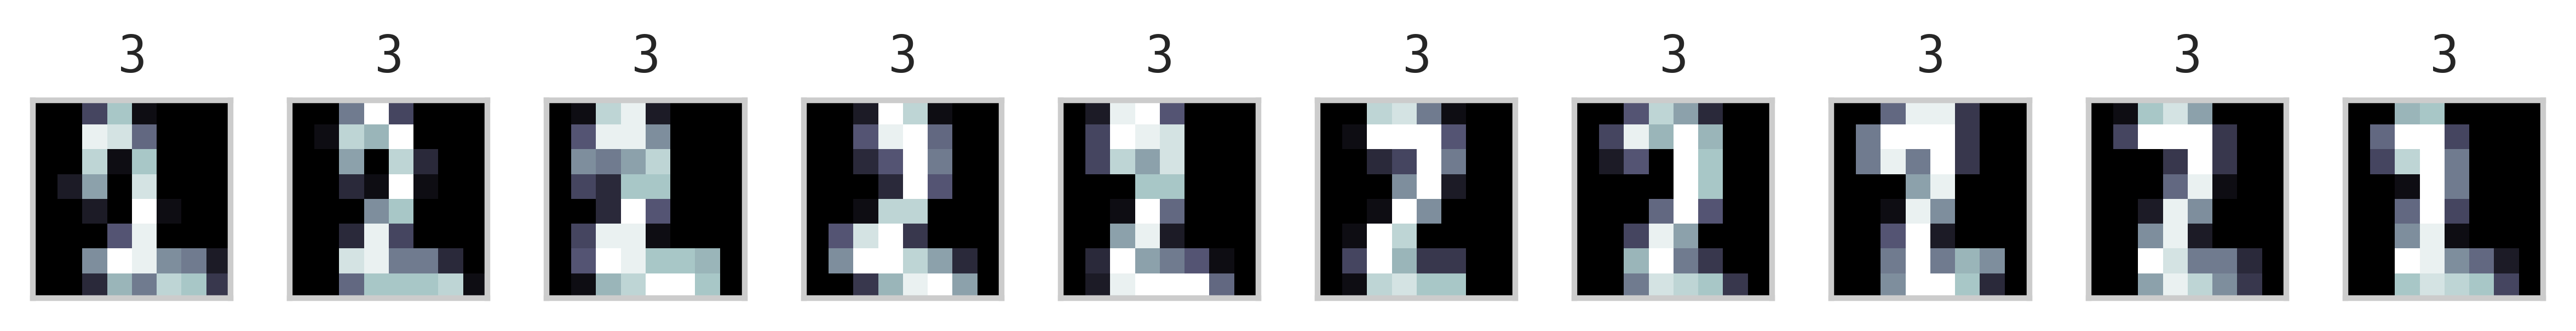

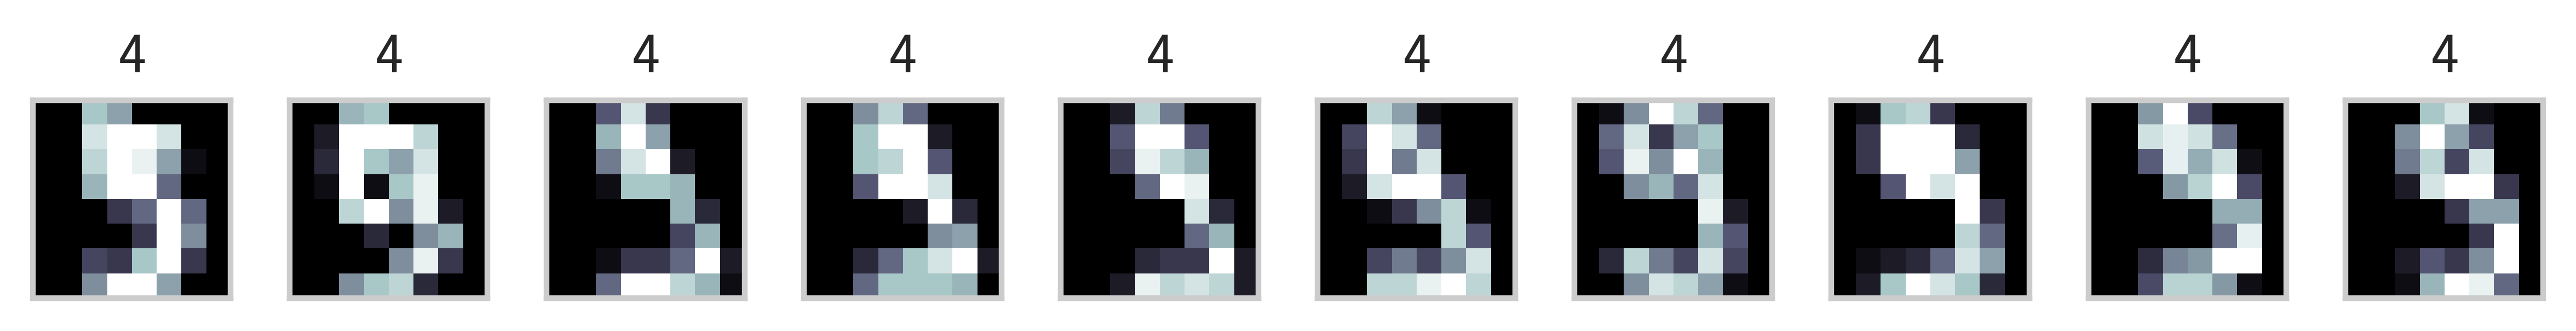

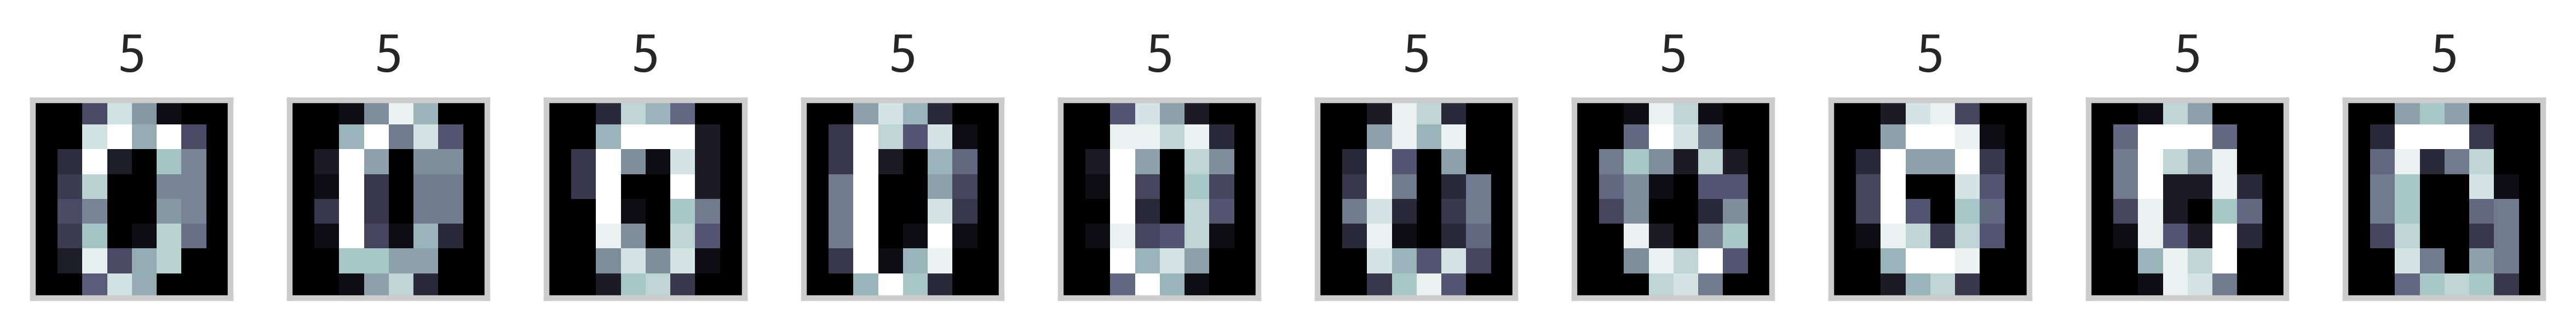

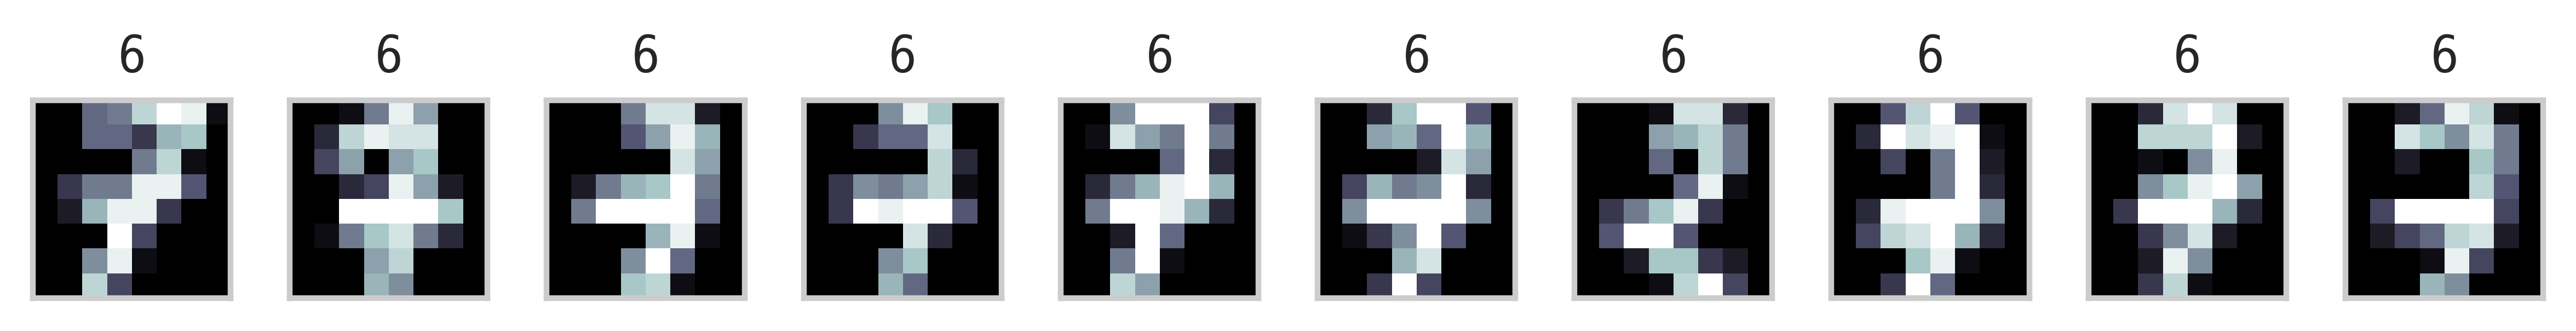

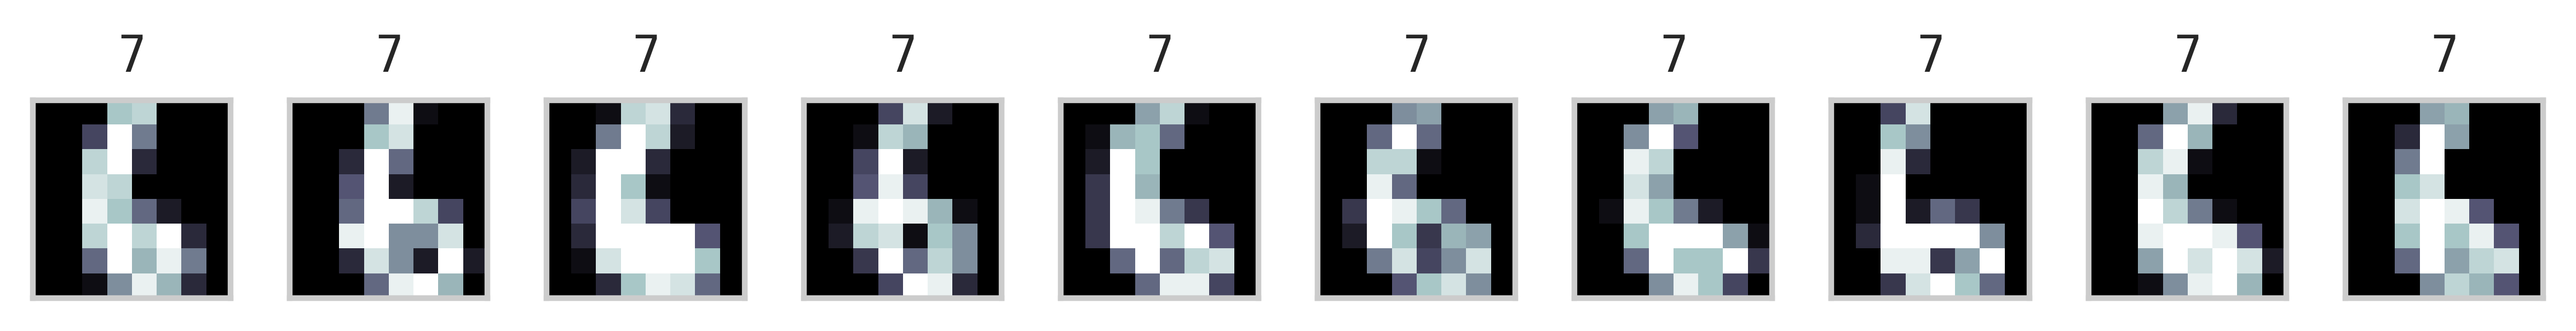

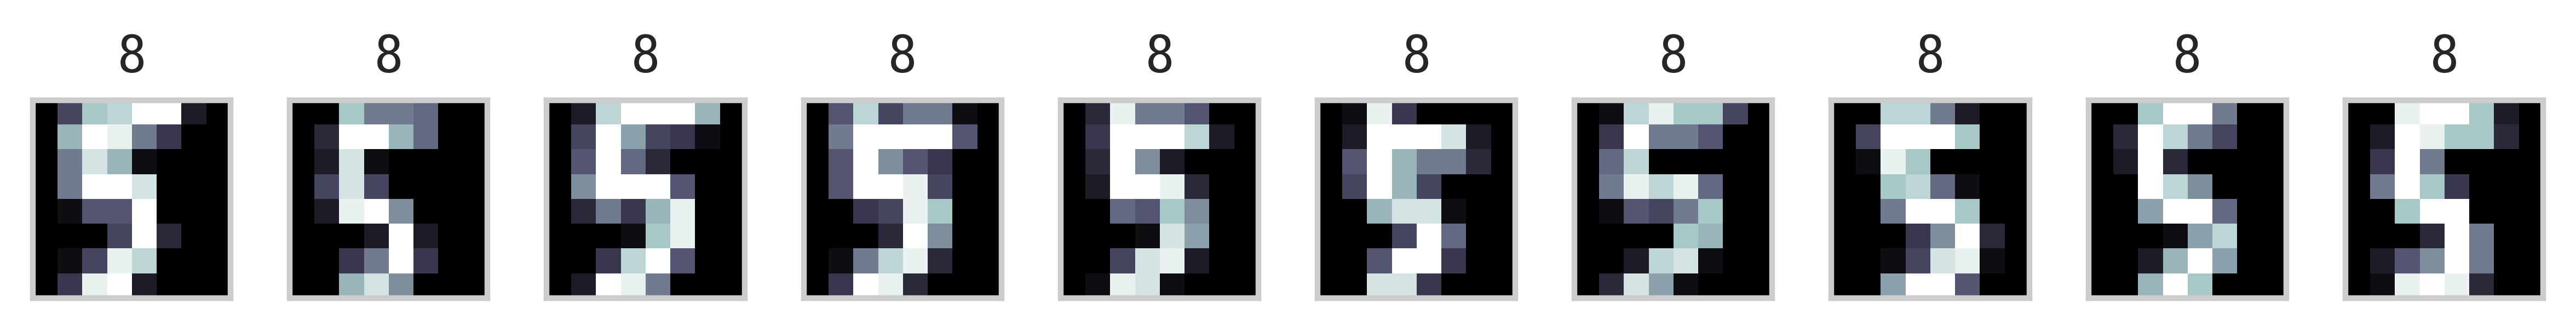

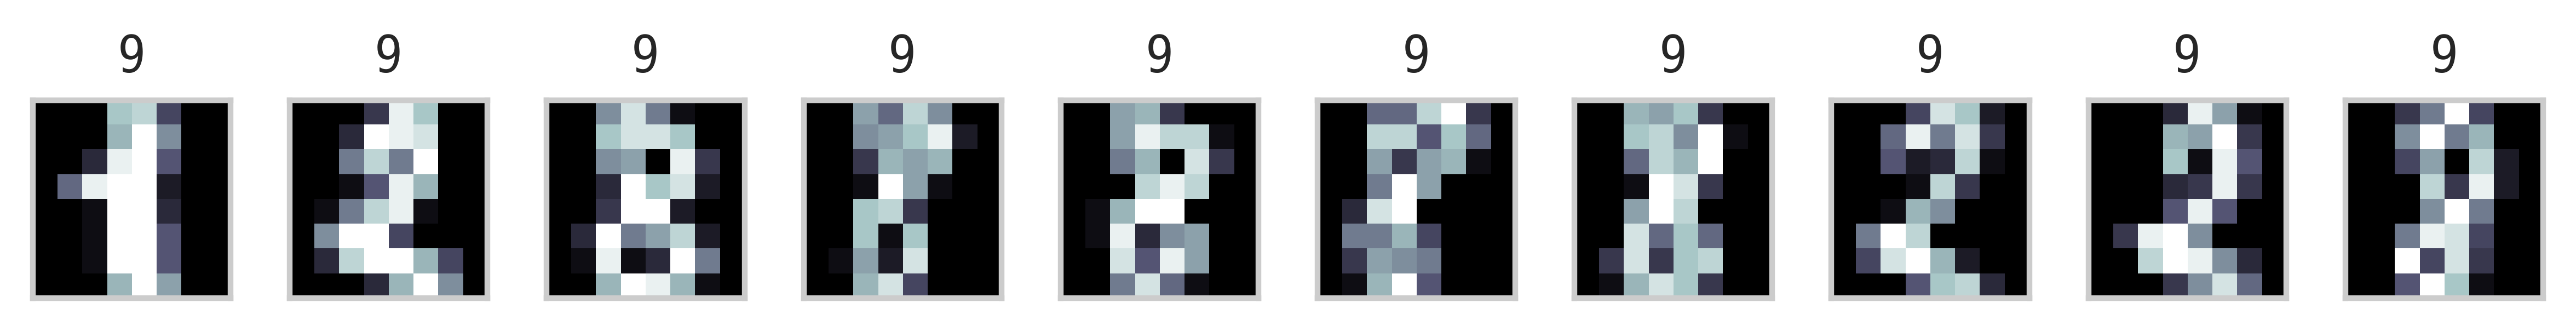

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

model = KMeans(init='k-means++', n_clusters=10, random_state=0)
model.fit(digits.data)
y_pred = model.labels_

def show_digits(images, labels):
    f = plt.figure(figsize=(8, 2))
    i = 0
    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.grid(False)
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1
        
def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_digits(images, y_pred)
    
for i in range(10):
    show_cluster(digits.images, y_pred, i)

In [3]:
from sklearn.metrics import confusion_matrix

confusion_matrix(digits.target, y_pred)

array([[  1,   0,   0,   0,   0, 177,   0,   0,   0,   0],
       [  0,   1,  55,  24,   0,   0,   0,   2,   1,  99],
       [  0,  13,   2, 148,   2,   1,   3,   0,   0,   8],
       [  0, 155,   0,   1,  11,   0,   7,   0,   2,   7],
       [163,   0,   7,   0,   0,   0,   7,   0,   0,   4],
       [  2,   1,   0,   0,  42,   0,   0,   1, 136,   0],
       [  0,   0,   1,   0,   0,   1,   0, 177,   0,   2],
       [  0,   0,   0,   0,   0,   0, 177,   0,   0,   2],
       [  0,   4,   6,   3,  48,   0,   5,   2,   4, 102],
       [  0,   6,  20,   0, 139,   0,   7,   0,   6,   2]], dtype=int64)

In [4]:
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score, silhouette_score

print('ARI: ', adjusted_rand_score(digits.target, y_pred))
print('AMI: ', adjusted_mutual_info_score(digits.target, y_pred))
print('Silhouette Score: ', silhouette_score(digits.data, y_pred))

ARI:  0.6703800183468681
AMI:  0.7417664506416767
Silhouette Score:  0.18249069204151275


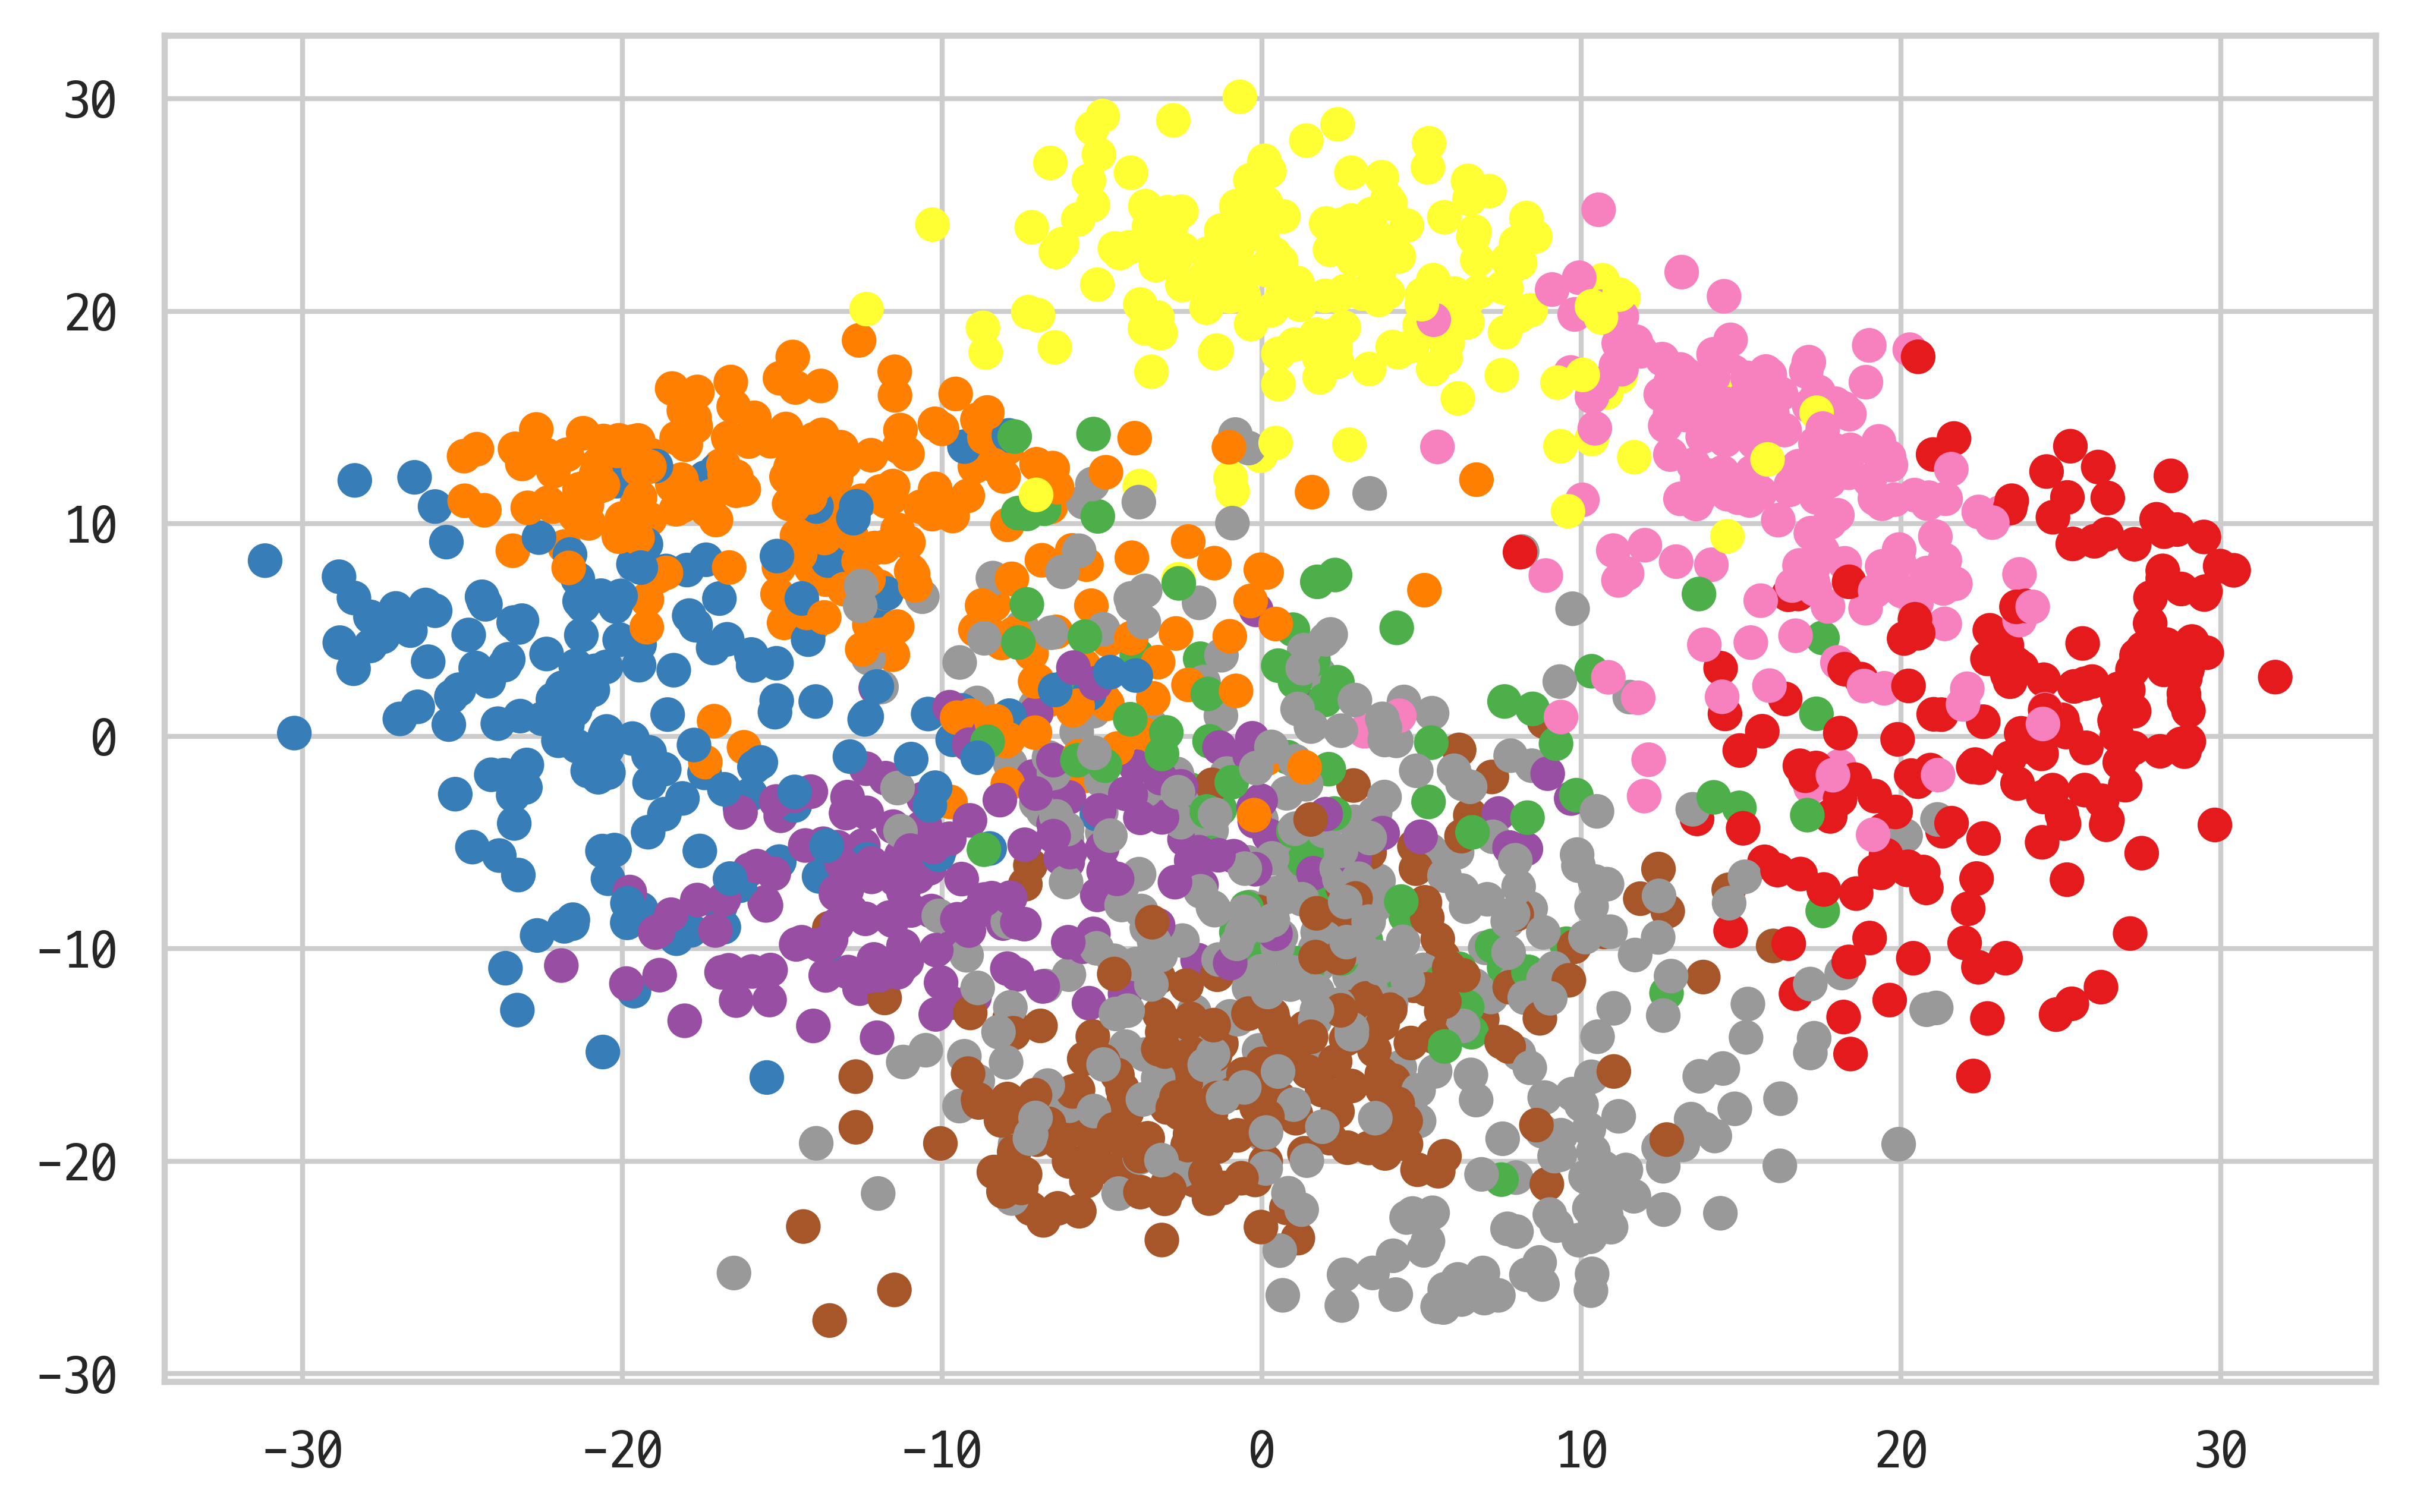

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(digits.data)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Set1)
plt.show()

#### Ex. 18.2.1

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X = pca.fit_transform(digits.data)

model = KMeans(init='k-means++', n_clusters=10, random_state=0)
model.fit(X)
y_pred = model.labels_

print('ARI: ', adjusted_rand_score(digits.target, y_pred))
print('AMI: ', adjusted_mutual_info_score(digits.target, y_pred))
print('Silhouette Score: ', silhouette_score(X, y_pred))

ARI:  0.6521999405051836
AMI:  0.7257716533154782
Silhouette Score:  0.26405051770373694


#### Ex. 18.2.2

In [16]:
from sklearn.datasets import load_iris

iris = load_iris()

model = KMeans(init='k-means++', n_clusters=3, random_state=0)
model.fit(iris.data)
y_pred = model.labels_

In [17]:
confusion_matrix(iris.target, y_pred)

array([[ 0, 50,  0],
       [ 2,  0, 48],
       [36,  0, 14]], dtype=int64)

In [18]:
print('ARI: ', adjusted_rand_score(iris.target, y_pred))
print('AMI: ', adjusted_mutual_info_score(iris.target, y_pred))
print('Silhouette Score: ', silhouette_score(iris.data, y_pred))

ARI:  0.7302382722834697
AMI:  0.7551191675800484
Silhouette Score:  0.5528190123564091


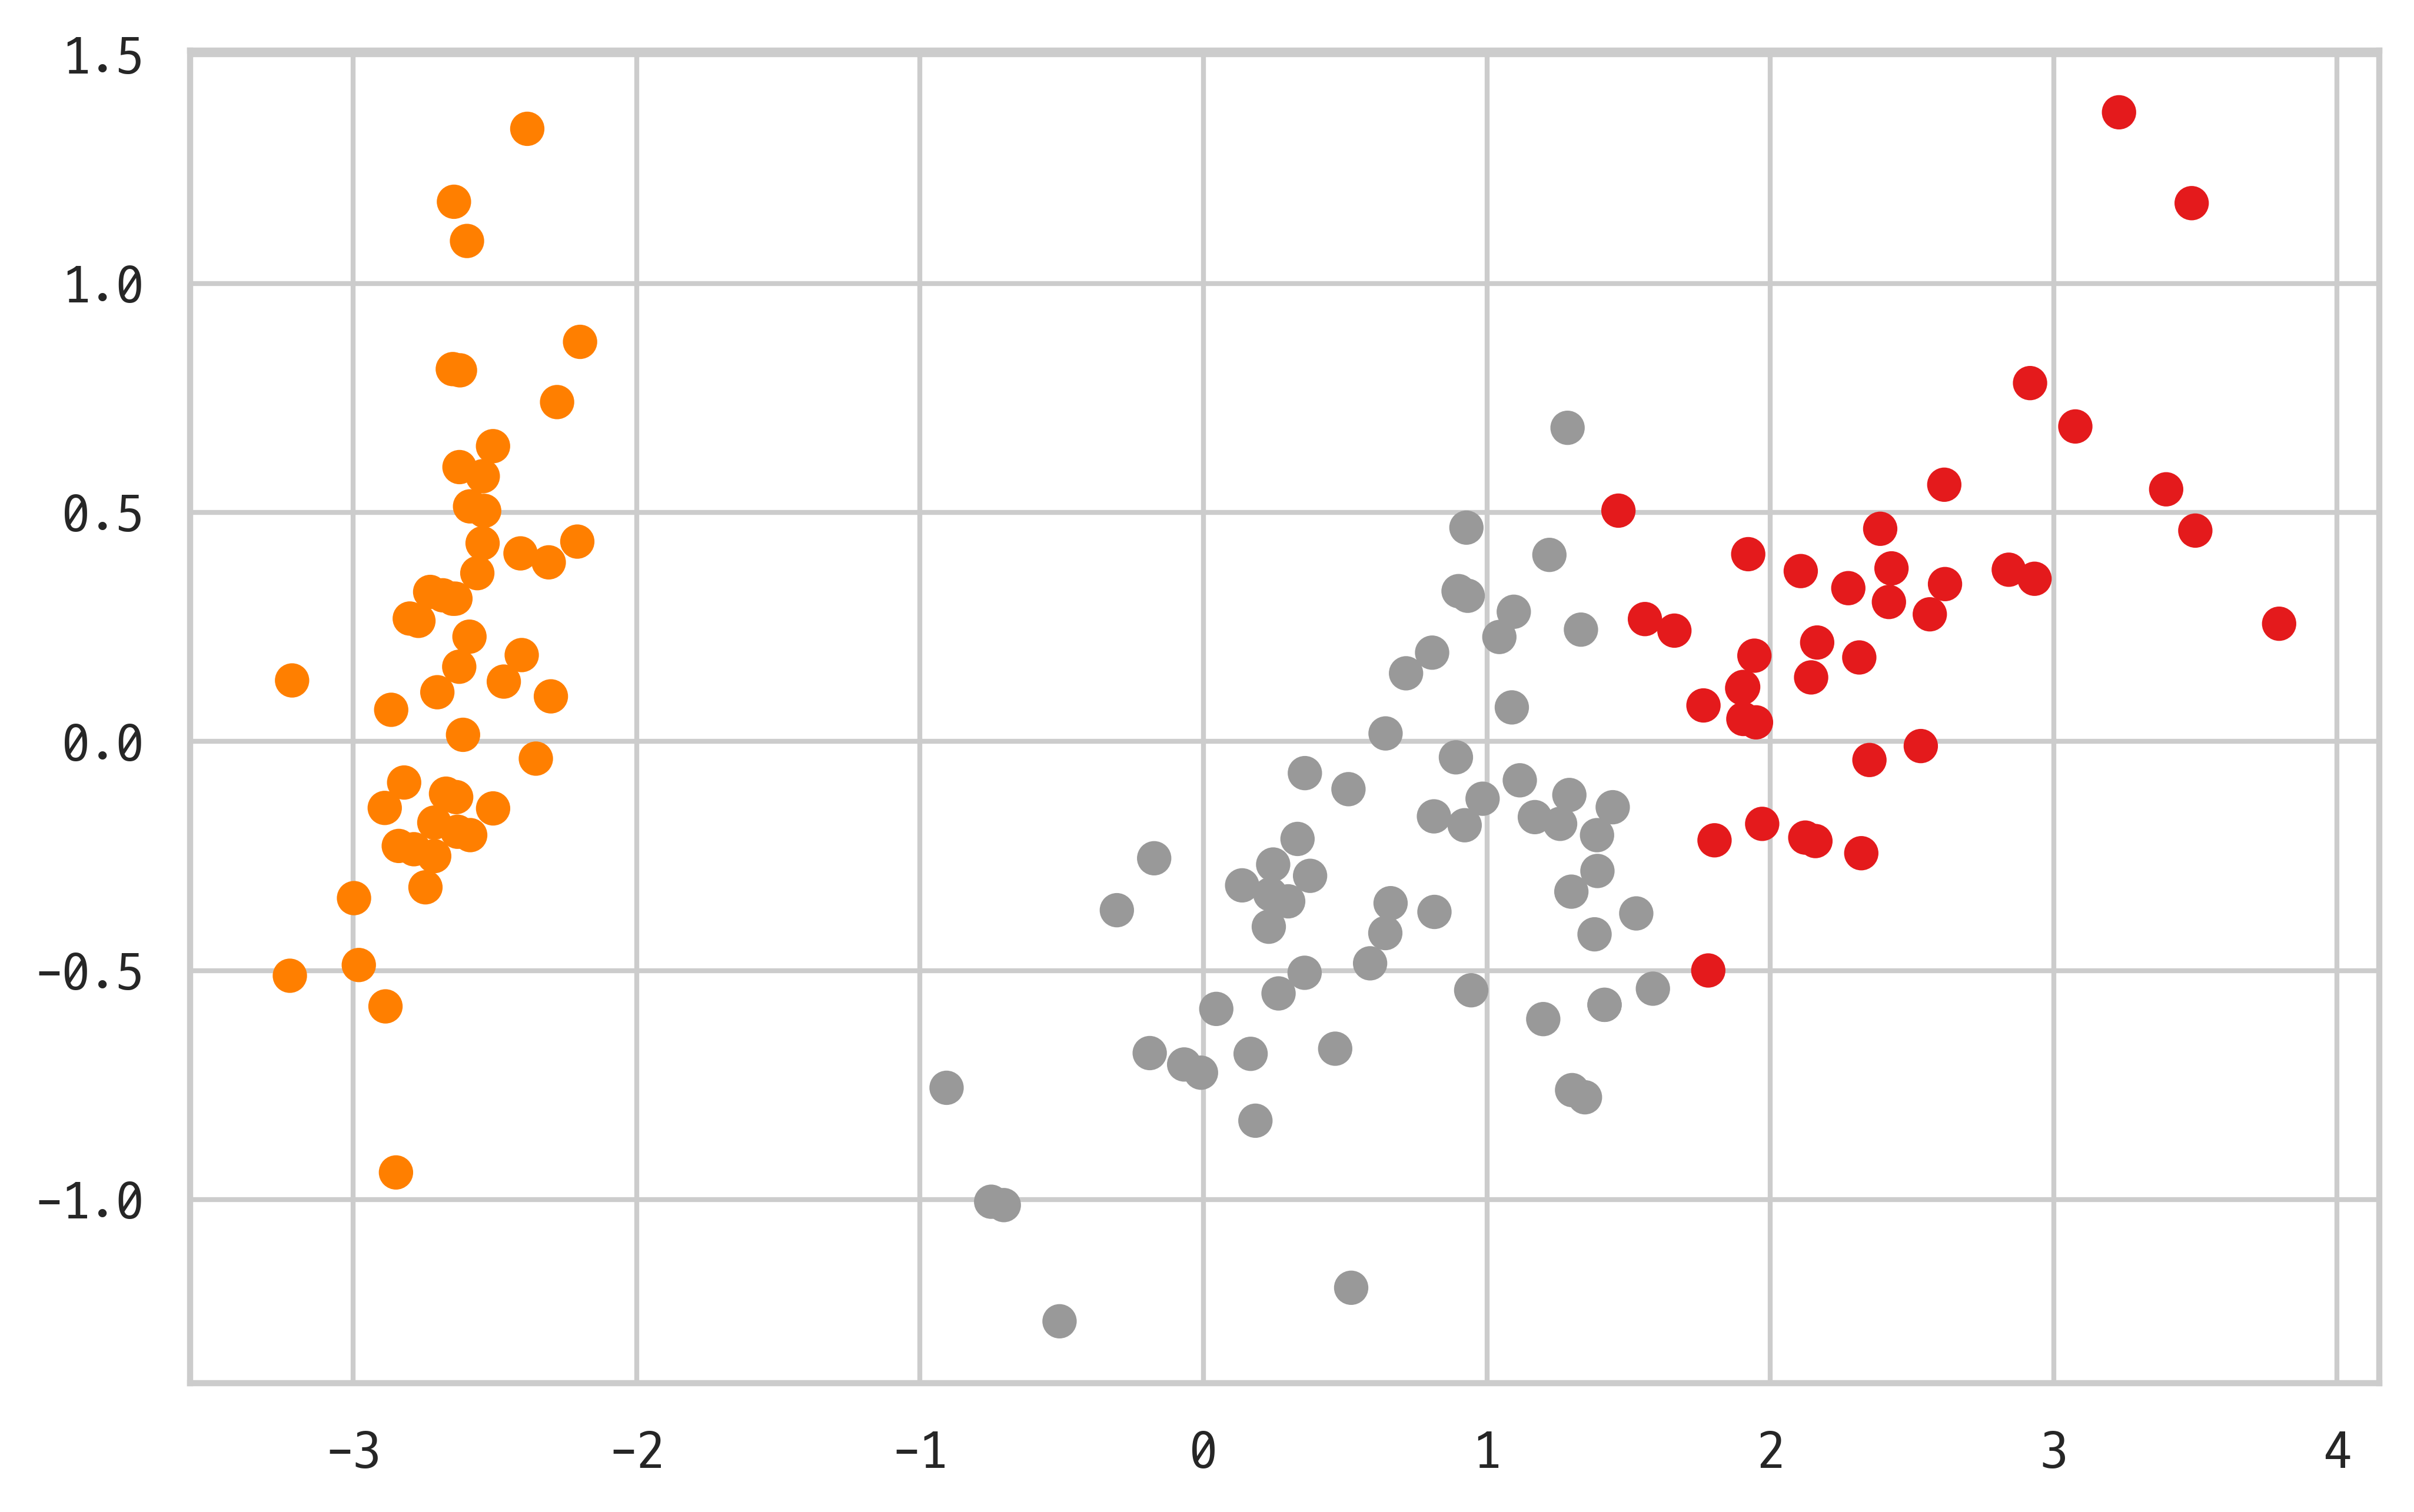

In [19]:
pca = PCA(n_components=2)
X = pca.fit_transform(iris.data)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Set1)
plt.show()

#### 미니배치 K-평균 군집화

In [20]:
from sklearn.cluster import MiniBatchKMeans

In [22]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150000, cluster_std=[1.0, 2.5, 0.5], random_state=170)

In [24]:
%time model1 = KMeans(n_clusters=3).fit(X)

Wall time: 1.24 s


In [25]:
%time model2 = MiniBatchKMeans(n_clusters=3, batch_size=1000, compute_labels=True).fit(X)

Wall time: 378 ms


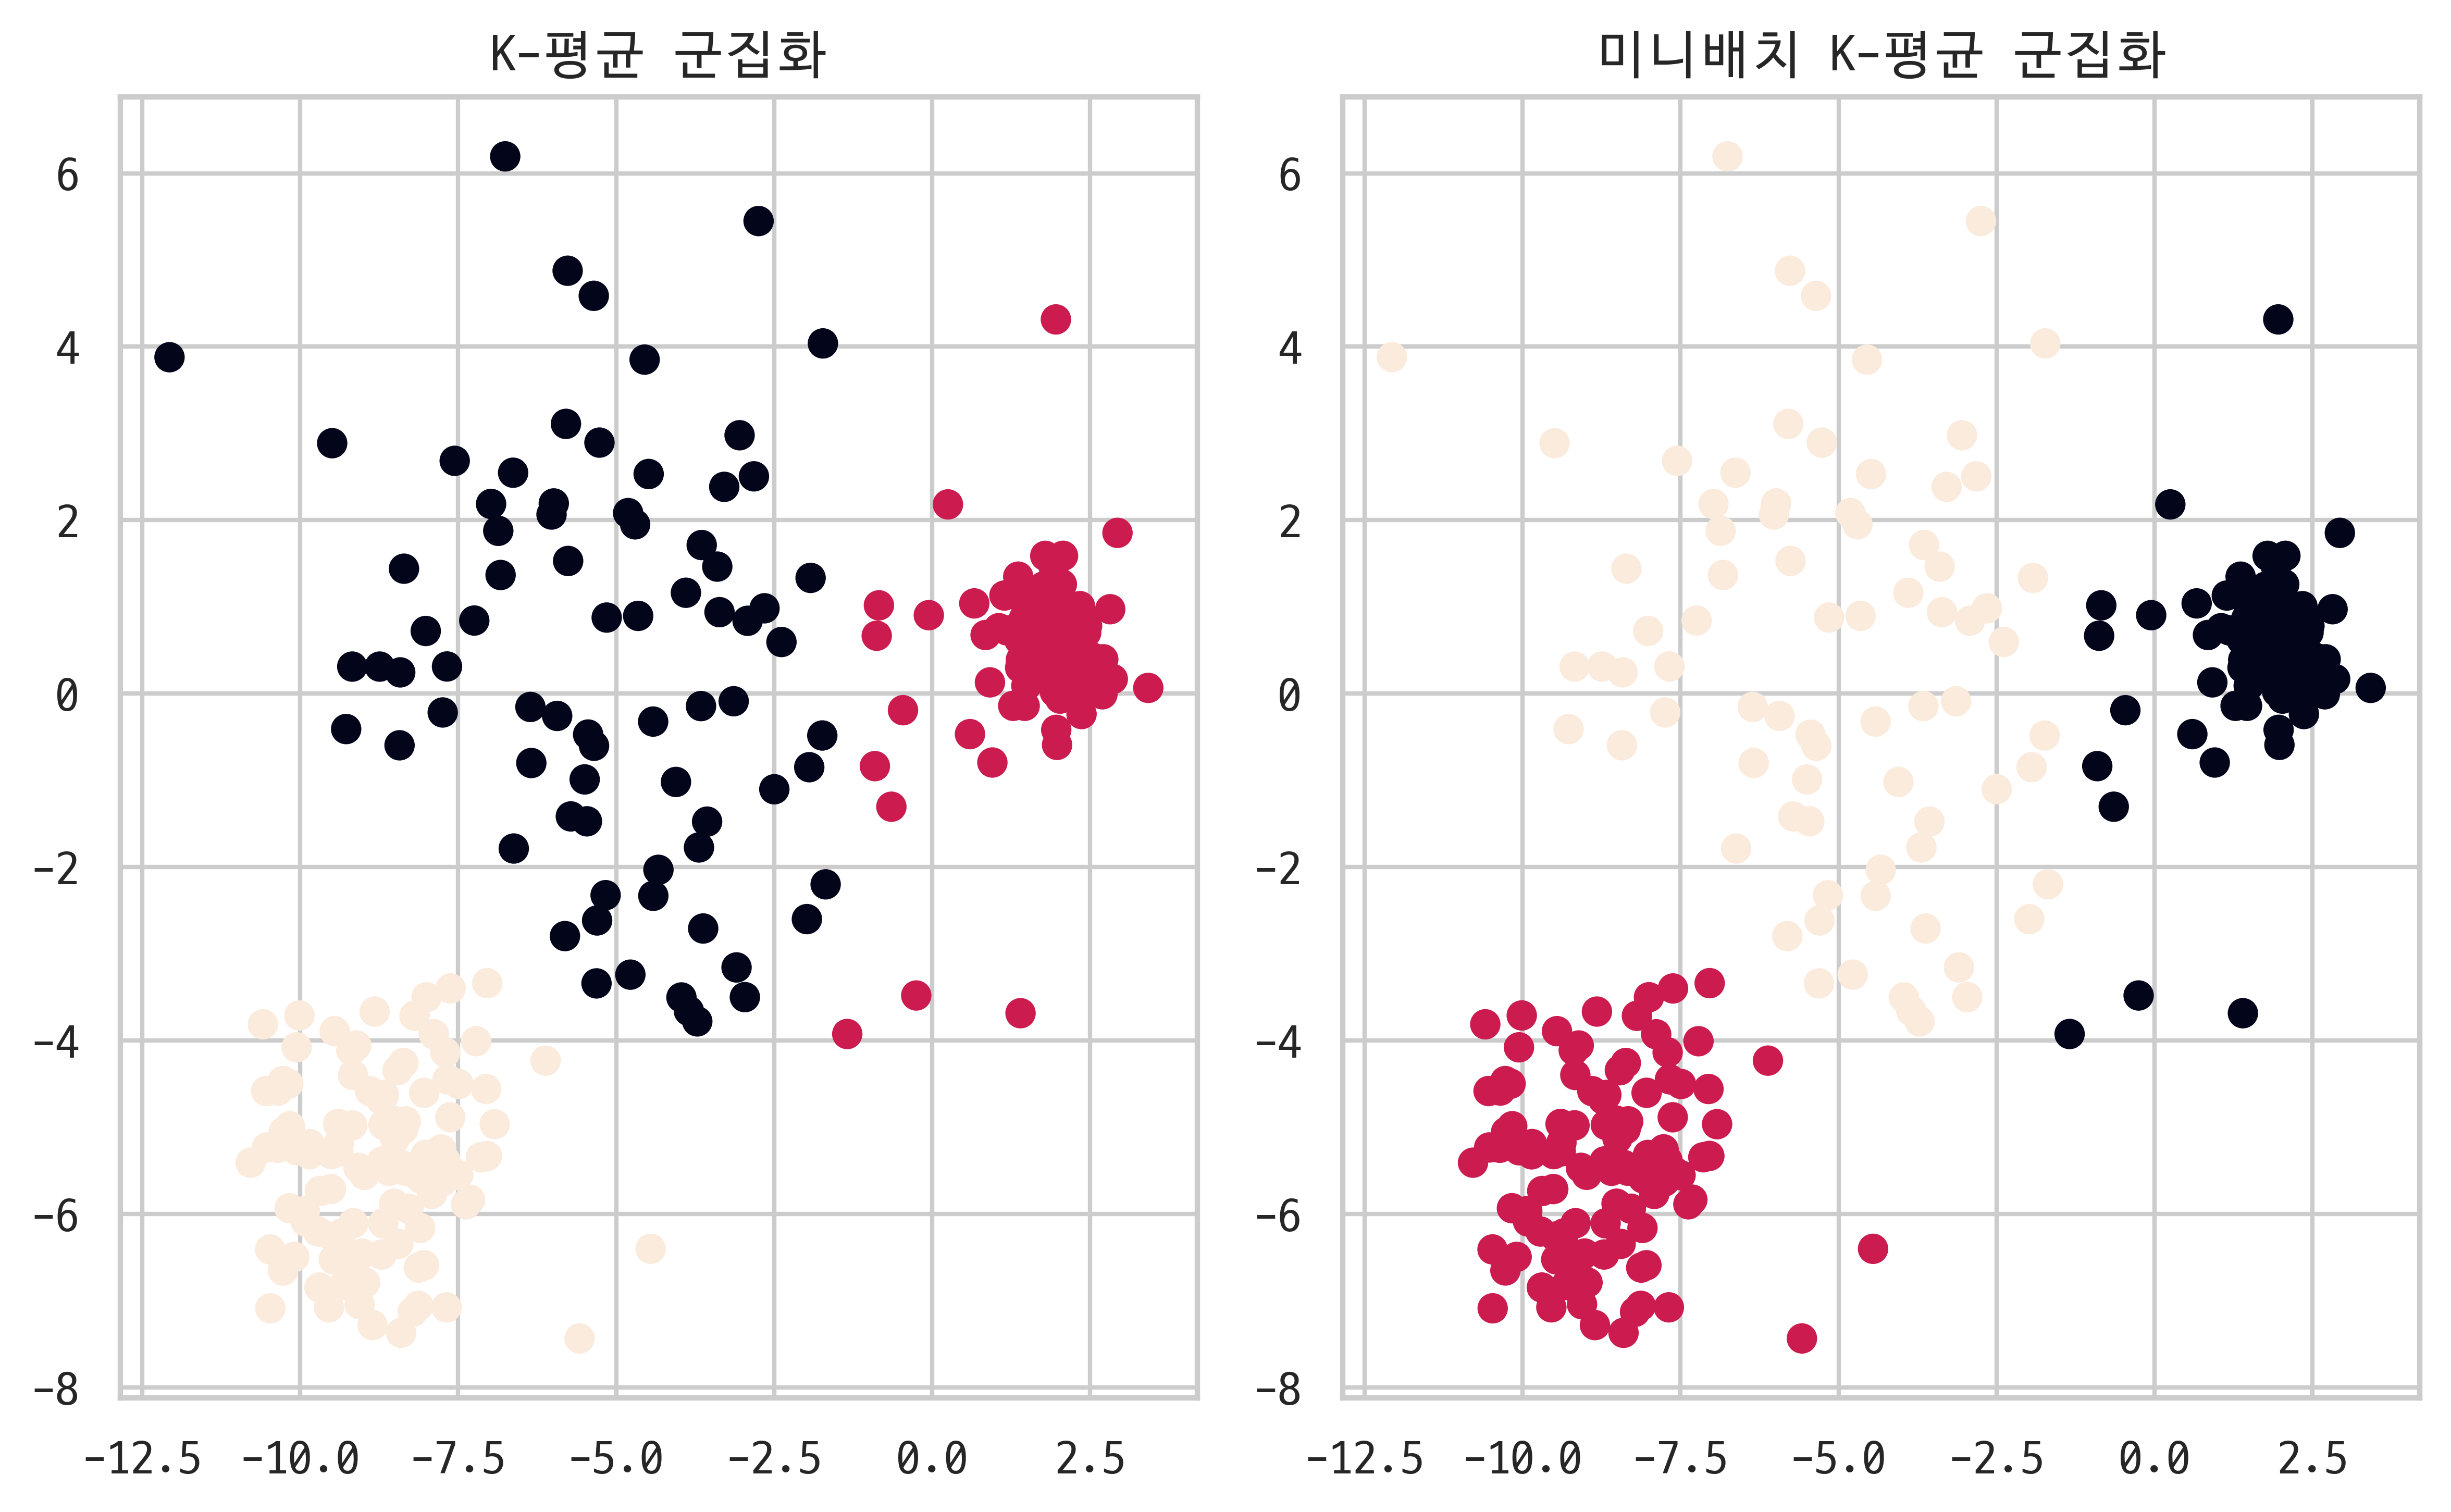

In [26]:
idx = np.random.randint(150000, size=300)
plt.subplot(121)
plt.scatter(X[idx, 0], X[idx, 1], c=model1.labels_[idx])
plt.title('K-평균 군집화')
plt.subplot(122)
plt.scatter(X[idx, 0], X[idx, 1], c=model2.labels_[idx])
plt.title('미니배치 K-평균 군집화')
plt.tight_layout()
plt.show()

#### Ex. 18.2.3

In [49]:
from sklearn.datasets import fetch_20newsgroups
news = fetch_20newsgroups()

from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=300000, stop_words='english').transform(news.data)

In [50]:
model = MiniBatchKMeans(n_clusters=20, batch_size=1000, compute_labels=True).fit(hv)

In [51]:
y_pred = model.labels_

In [52]:
confusion_matrix(news.target, y_pred)

array([[  0,  12,   6,   0,   0,   0,  71,   0,  60,   2,  77,   8,  31,
         15,   0,  85,  68,   5,  15,  25],
       [  0,  36,  83,   3,   0,   0,   1,   0,  18,  32,  20, 174,  54,
         12,   0,   2, 106,   3,   0,  40],
       [  0,  53, 102,  26,   1,   0,   0,   0,  34,  33,  16, 118,  53,
         12,  17,   1,  89,   9,   0,  27],
       [  0,  72,  71,  34,   0,   0,   0,   1,   7,  31,   8,  79,  70,
         11, 118,   0,  59,  17,   0,  12],
       [  0,  46,  92,  29,   0,   0,   0,   0,  30,  25,  17,  84,  38,
          8,  55,   0, 123,  15,   0,  16],
       [  0,  78,  72,   9,   8,   0,   0,   0,   9,  12,   7, 186,  83,
         16,   2,   0,  57,   3,   2,  49],
       [ 12,  64, 195,   3,   0,   0,   0,   7,   5,  13,   8,  67,  45,
         11,  25,   1, 118,   8,   0,   3],
       [  0, 102,  65,   0,   0,   1,   0,   1,  86,  23,  63,  34,  97,
          6,   1,   2,  92,  10,   7,   4],
       [  0, 108,  41,   0,   0,   0,   0,   0,  73,  63,  31,  

In [53]:
print('ARI: ', adjusted_rand_score(news.target, y_pred))
print('AMI: ', adjusted_mutual_info_score(news.target, y_pred))
print('Silhouette Score: ', silhouette_score(hv, y_pred))

ARI:  0.05997287202292356
AMI:  0.19016273840787506
Silhouette Score:  0.0048376342059022


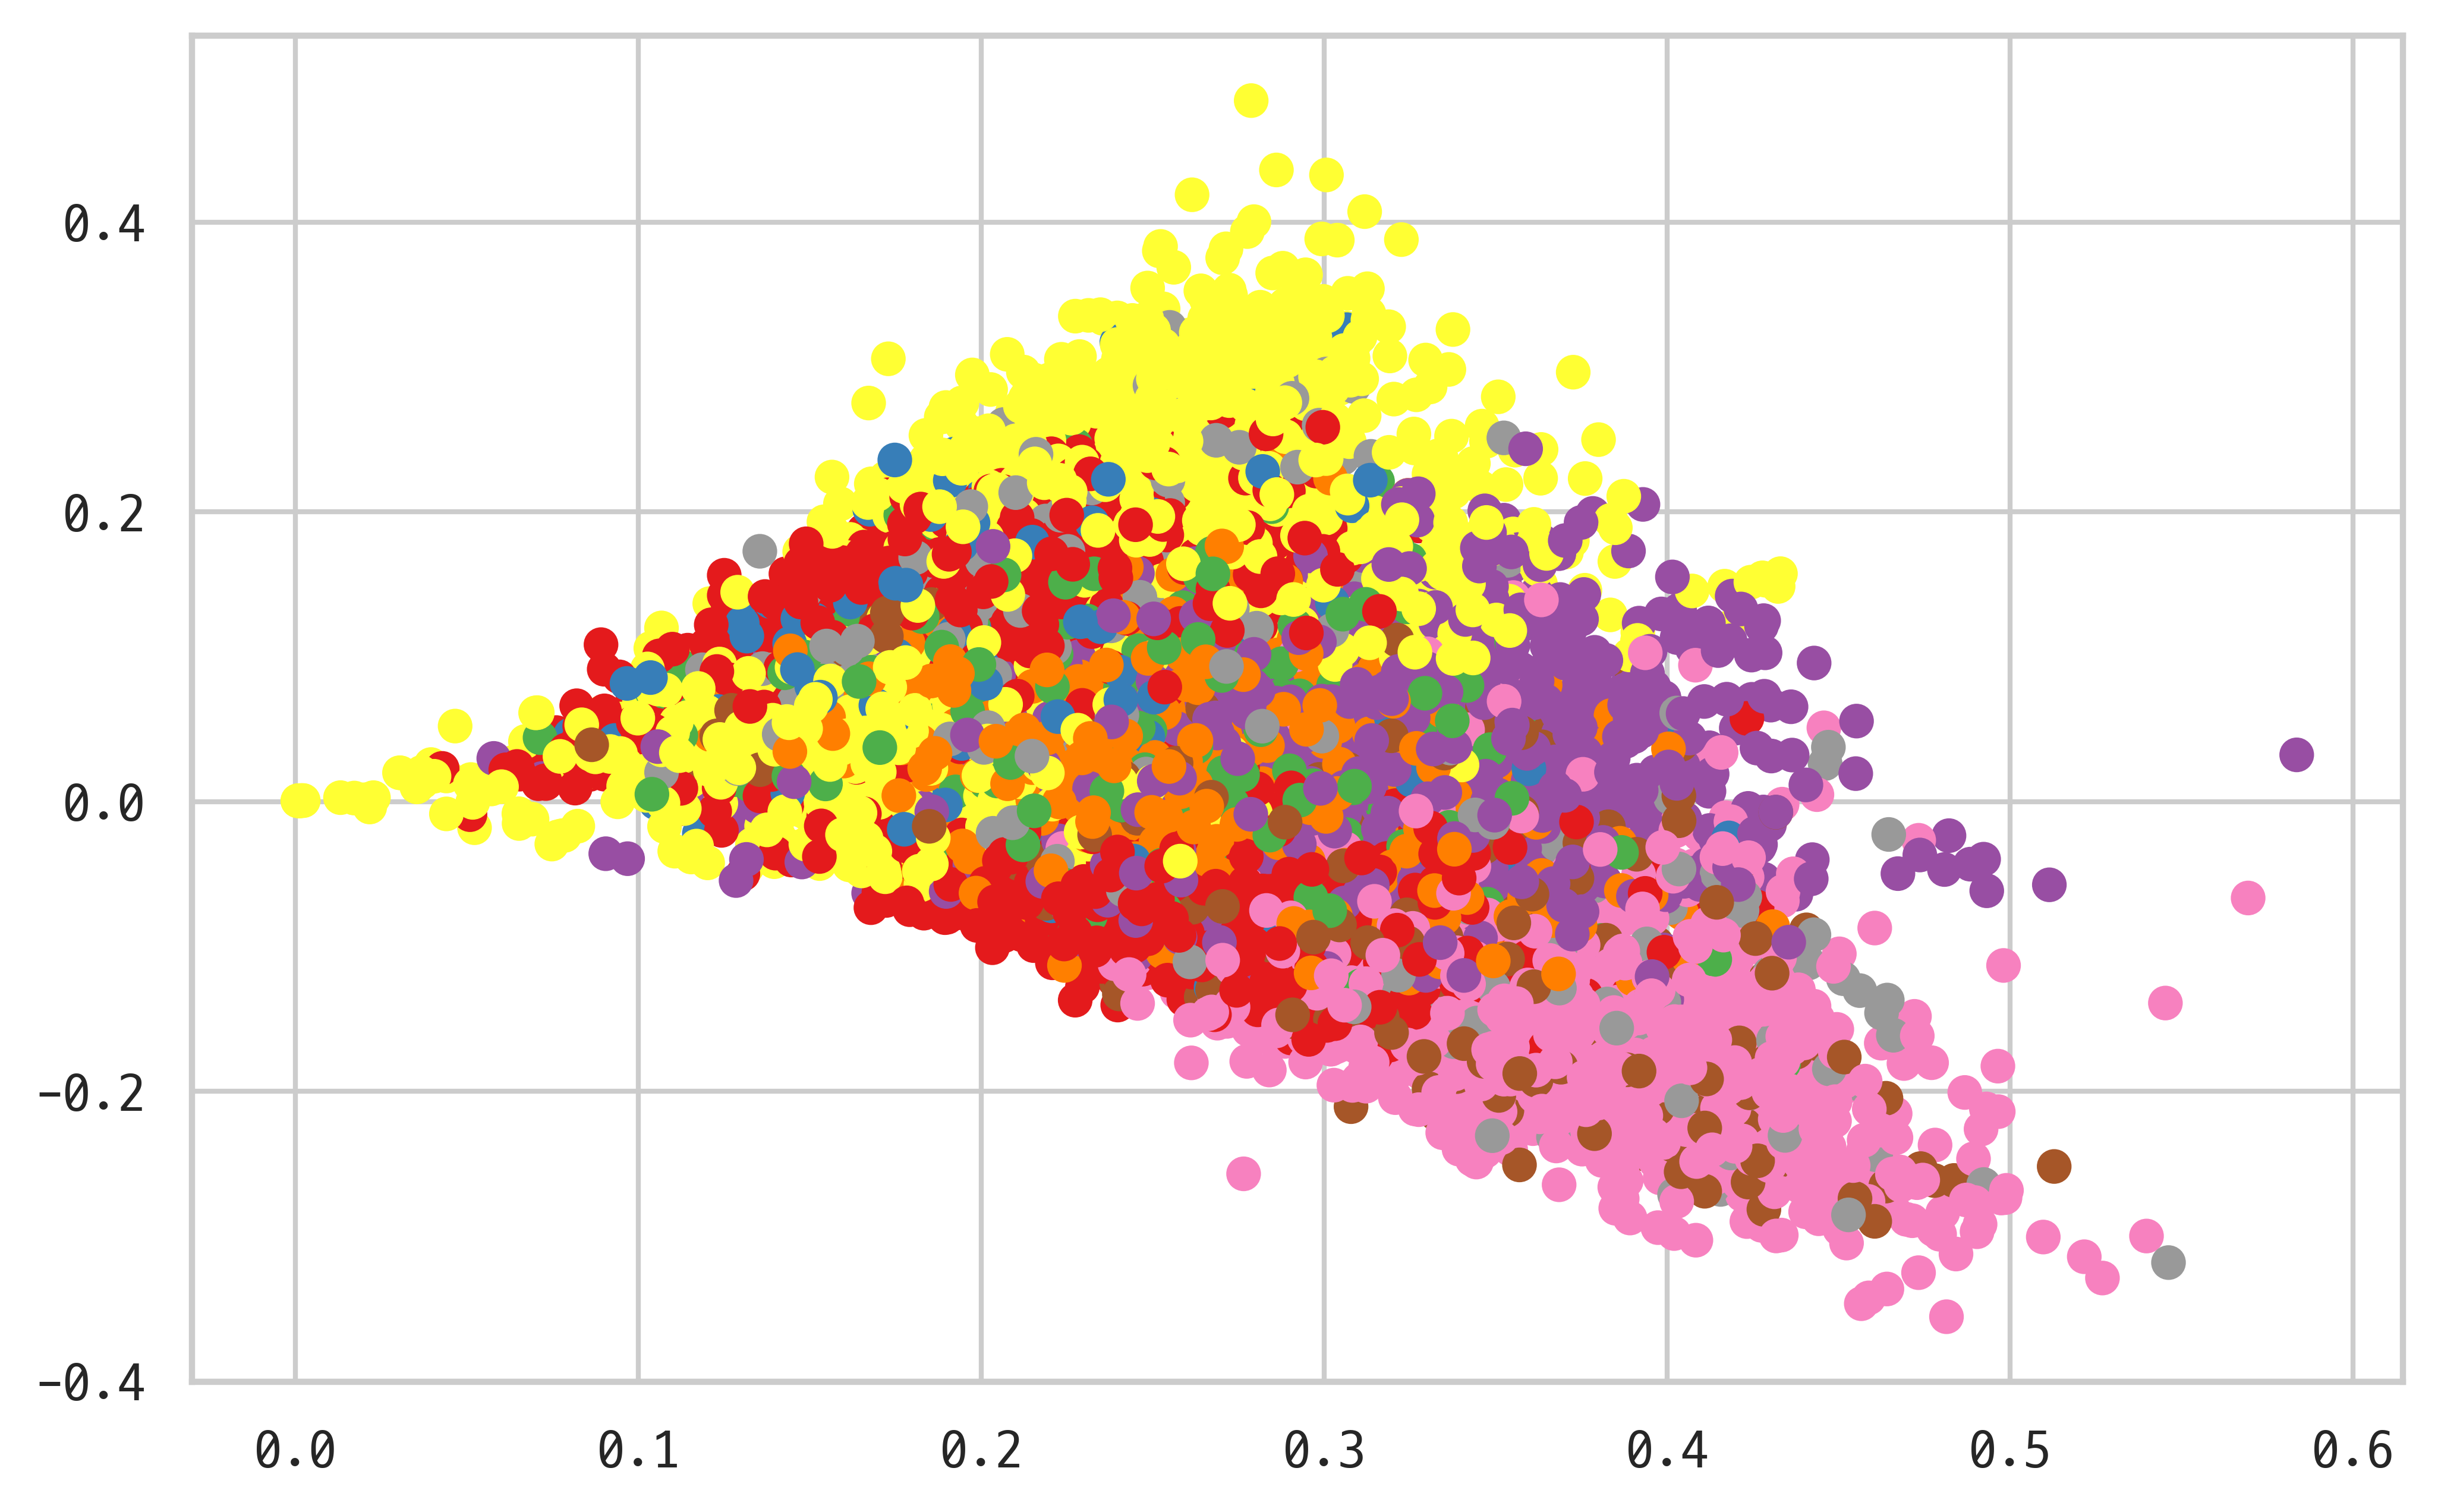

In [54]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
X = svd.fit_transform(hv)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Set1)
plt.show()